## 공공데이터의 지역별 분양가 시각화 하고 정리하기

* melt 사용. 데이터 유사형태로 만들고 데이터 전처리
* concat으로 데이터 잇기
* 분양가 시각화 
* groupby 와 pivot_table 을 활용하여 연산
* 연산한 데이터 heatmap의 색상의 농도로 표현 
* Seanorn 그래프 이용 시각화
* boxplot, boxenplot, violinplot, swarmplot 등<br> 
<br>
* 과제 : 최근 공공데이터포털의 데이터 병합하여 시각화 및 분석해 볼 것.

In [55]:
%ls data

import pandas as pd

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 0086-AFF6

 C:\Users\soomin\인프런_공공데이터분석\inflearn_lecture_opendata\data 디렉터리

2021-06-17  오후 06:34    <DIR>          .
2021-06-17  오후 06:34    <DIR>          ..
2021-06-17  오후 06:30           129,387 pandas_melt.jpg
2021-06-17  오후 06:34           394,102 pandas_melt.png
2020-03-05  오전 07:28             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-03-05  오전 07:28           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
               4개 파일             688,162 바이트
               2개 디렉터리  316,179,066,880 바이트 남음


In [56]:
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949")
df_last.shape  # (행,렬)순 출력 

(4335, 5)

In [57]:
df_last.head()   # shift+tap : 도움말 보기 또는 .head ? :도움말 보기

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [58]:
df_last.tail()  #마지막 5개 tail로 미리보기 
                # NaN  not a number 결측치 

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [59]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [60]:
df_first.tail()  #최근 데이터와 전혀 다른 모습 => 두개의 데이터 합쳐야 전체 분석 가능. 

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [61]:
df_last.info()  # 4335개의 인덱스 번호, 
                # 분양가격에 결측치 확인 가능.  object type-> 숫자형 변경 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [62]:
# isnull 을 통해 결측치를 봅니다. => true , false를 각각1,0으로 표현 

df_last.isnull().sum()  #결측치 수 구하기 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [63]:
df_last.isna().sum()  #로도 결측치 확인 가능 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [64]:
# df_last["분양가격(㎡)"].astype(int)  # value error 발생 -> 공백문자를 int로 변경 불가

df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")  
#역시 value error -> shift+tap 옵션 확인 -> coerce 

df_last["분양가격"]  # dtype: float64 변경됨 

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

In [65]:
df_first  #단위를 똑같이 만들어줄 필요가 있음
df_last["분양가격"]*3.3 # 평당 분양가격으로 컬럼 변경 : 전처리 -> 평당분양가격에 넣기
df_last["평당분양가격"] = df_last["분양가격"]*3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [66]:
df_last.info() # 새로 생성한 컬럼의 데이터 타입 float으로 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [67]:
df_last["분양가격(㎡)"].describe() # 기술통계값 한번에 확인 가능
#describe 을 요약하게 되면, 수치데이터가 아닐시, object타입(문자형태)을 요약하게 되므로,
# 밑의 수치데이터와 값이 다르게 나옴. 
# 공백문자가 있었기 때문에 coount 의 수 더 높음. 

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [68]:
df_last["분양가격"].describe()  # 수치데이터의 기술통계 요약 확인 
#std 표준편차
#50% 중앙값
#max 값이 75%와 큰 차이 확인 가능
# *** mean과 중앙값의 차이를 확인 해야함 *** 

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [69]:
df_last #규모구분 컬럼의 내용을 변경하는게 나아보임 -> 메모리 효율성 등을 위해서. 
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [70]:
df_last["전용면적"] =  df_last["규모구분"].str.replace("전용면적", "")
# pandas 에서 제공하는 str 메서드 사용 

df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~") 
df_last["전용면적"] = df_last["전용면적"].str.replace("이하" , "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip() #앞뒤 공백제거까지
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN,60㎡
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4,60㎡~85㎡
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN,85㎡~102㎡


In [71]:
df_last.head(1)
df_last.info()  # memory usage: 271.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [72]:
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

In [73]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [74]:
df_last.info()  #memory usage: 203.3+ KB 로 메모리 감소 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [75]:
# df_last.groupby(["지역명"]).mean() # 모든 값의 평균 구할 필요 X
df_last.groupby(["지역명"])["평당분양가격"].describe() # 모든 값 확인 가능 
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [76]:
#전용면적으로 분양가격의 평균 구하기. 면적별 평균가격 
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [77]:
#지역명, 전용면적으로 평당분양가격의 평균
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean()
df_last.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [78]:
#연도별, 지역명으로 평균 평당 분양 가격
df_last.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().T
g = df_last.groupby(["연도","지역명"])["평당분양가격"].mean()
g.unstack().T  # g.unstack().transpose()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [79]:
# groupby 와 pivot table의 차이점 알아보기
# pd.pivot_table?

In [80]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean") 
#모든 수치 데이터에 적용

#** groupby로 출력하면 => 시리즈 형태로 출력
#** pivot table 출력 => 데이터 프레임으로 출력 

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [81]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()
#시리즈 형태의 출력 -> 데이터 형태가 아니기 때문에 => **속도 빠름**. 

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [82]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()
# pd.pivot? 과 pd.pivot_table 의 차이점 - aggfunc 유무차이 
# pivot : 데이터의 형태만 바꾸고자 할때 (그룹화 연산) 

pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [83]:
#지역명, 전용면적으로 평당분양가격의 평균
# df_last.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack()

df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [84]:
#연도별, 지역명으로 평균 평당 분양 가격
# df_last.groupby(["연도","지역명"])["평당분양가격"].mean()

p = pd.pivot_table(df_last, index=["연도","지역명"], values="평당분양가격")
p.loc[2018]  #loc는 행을 기준으로 가져올때 지정하는 것. 

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


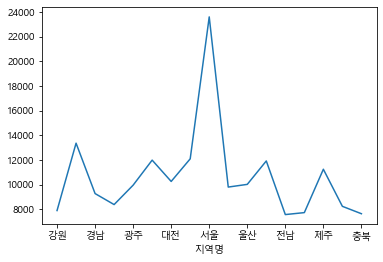

In [85]:
# 시각화
# Pandas로 시각호하기 -> 선그래프와 막대그래프 

df_last.groupby(["지역명"])["평당분양가격"].mean().plot()
# missing from current font. 오류  
# => 한글폰트 지정할 필요가 있음 

In [86]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
# window "Malun Gothic"  mac "AppleGothic"

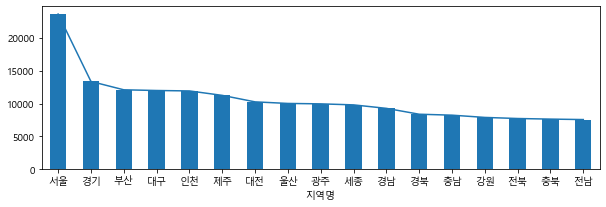

In [87]:
df_last.groupby(["지역명"])["평당분양가격"].mean()
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()  # 선그래프 
g.plot(kind="bar")  # 막대그래프 
g.plot.bar(rot=0, figsize=(10,3))  # figsize : 그래프의 크기 조정 

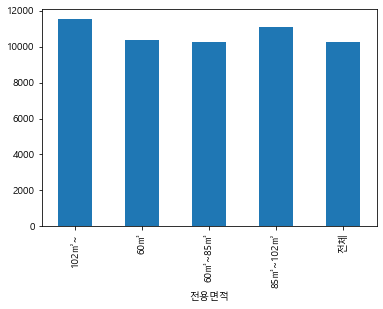

In [88]:
# 전용면적별, 분양가격 평균 -> 막대그래프(bar)로 시각화
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

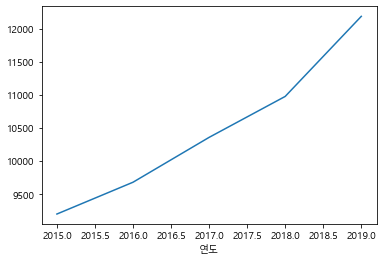

In [89]:
# 연도별 분양가격의 평균 -> 막대그래프(bar)로 시각화
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

* box plot 으로 시각화 - pivot table 로 
* 박스플롯의 장점 -> 5가지 요약수치 - 기술통계의 수치   확인 가능하다 

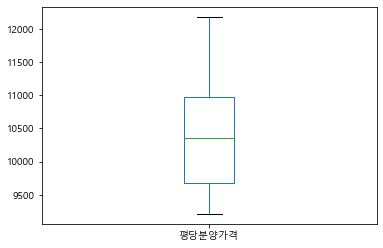

In [90]:
df_last.pivot_table(index="연도", values="평당분양가격").plot.box()

# 점 : 이상치    (3사분위 값 - 1사분위 값) X1.5 보다 초과하면 이상치 
# (3사분위 값 - 1사분위 값) X1.5 보다 초과하면 이상치 

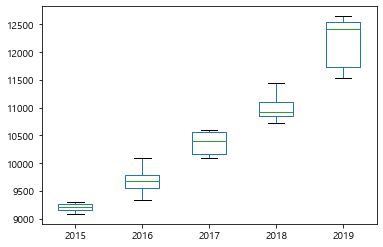

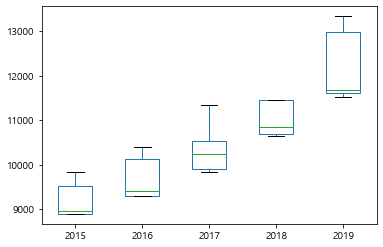

In [91]:
# 월별 연도의 평균 값 box plot
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()
# => 최소값, 최대값 이 표현되므로, 변동폭의 정도를 확인 가능함 

# 전용면적 별 연도의 평균 값 box plot
df_last.pivot_table(index="전용면적", columns="연도", values="평당분양가격").plot.box()

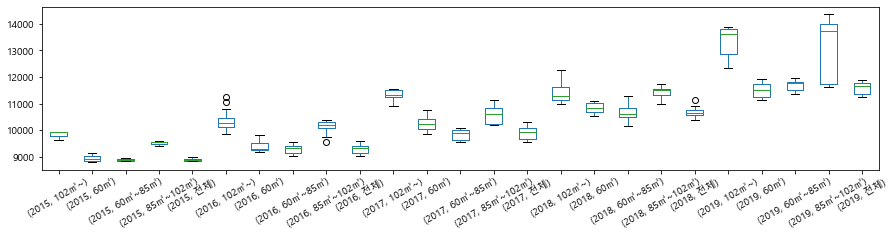

In [92]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)

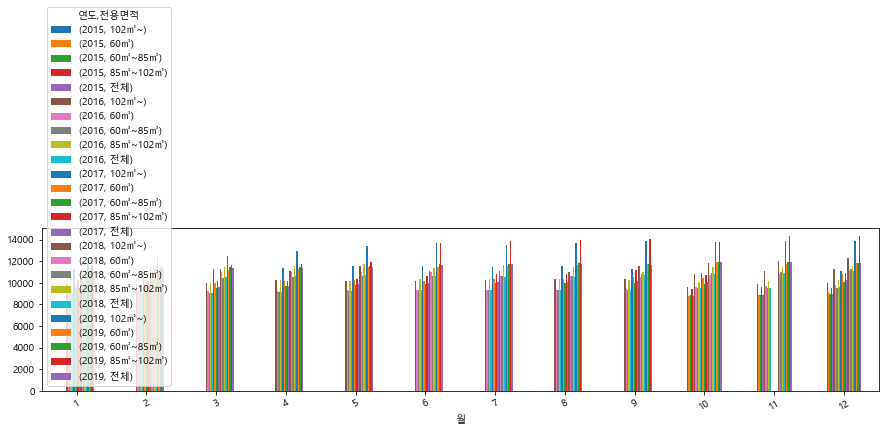

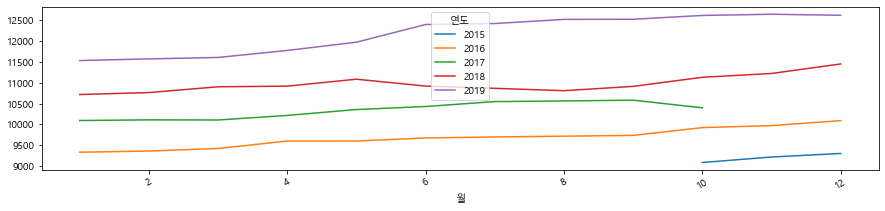

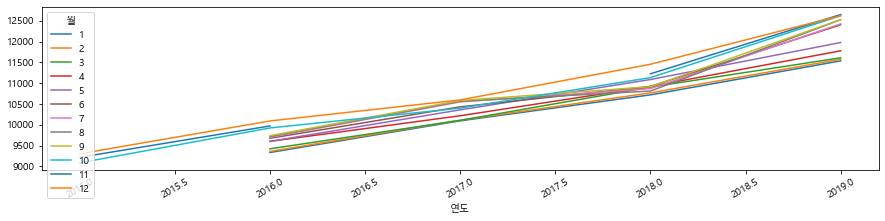

In [93]:
# 같은 그래프를 바 그래프로 시각화 
p.plot.bar(figsize=(15, 3), rot=30)

p = df_last.pivot_table(index="월", columns=["연도"], values="평당분양가격")
p.plot(figsize=(15, 3), rot=30)

p = df_last.pivot_table(index="연도", columns=["월"], values="평당분양가격")
p.plot(figsize=(15, 3), rot=30)
# 연도별 특정 월의 데이터 누락됐음을 그래프에서 확인 가능 

* Pandas에는 matplotlib 기능이 내장되어 있기 때문에
<br>**-> 시리즈, 데이터프레임 형태로 바로 시각화 가능하다**

In [94]:
# 1.7  Seaborn  으로 시각화 해보기
import seaborn as sns

#구 버전의 주피터노트북을 사용할 경우
# %matplotlib iline  를 설정해줘야 주피터노트북에서 시각화 표현 됨. 

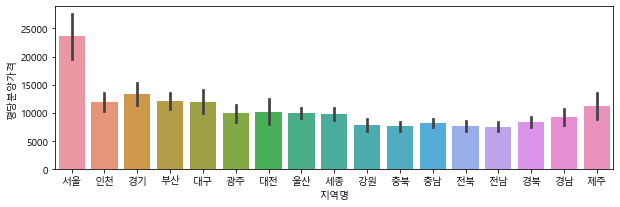

In [95]:
# barplot으로 지역별 시각화
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci="sd")#, color="b")
# 가운데 점들은 ci(confidence intervals)의미.
# ci 기본값을 95 -> 신뢰구간 95% 비율로 추정한 값.샘플링 했을때 값이 포함된 그래프. 
# 나머지 5%의 값은 이상치로 볼 수 있음. 

# ci="sd" => oversrvation value (실제 관측값을 기반으로 시각화)
# -> 서울의 편차가 큼 확인 가능

# ci="None"  옵션을 허용하지 않음 

# sns.barplot?  or  sns.barplot()
# example 의 예제를 보고 옵션 활용 확인하기 **


- **Pandas 시각화 -> 직접 연산을 해야함.**

- **Seaborn 은 통계적 연산을 바로 함. => 연산을 하지 않아도 내부에서 알아서 계산.** 
<br>Seaborn 은 matplotlib 을 기반으로 만들어졌기 때문에, 
<br>* plt.fiture(figsize=(,)) 로 크기 조정 가능 

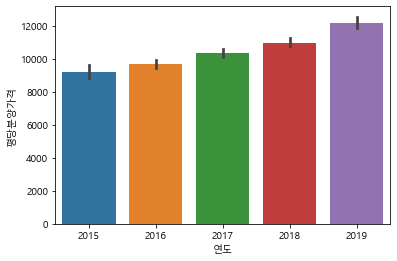

In [96]:
# barplot으로 연도별 평당(평균)분양가격 시각화

sns.barplot(data=df_last, x="연도", y="평당분양가격")
# df_first와 합치지 않았기 때문에 2015년부터 보여줌

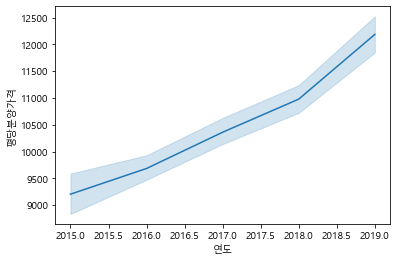

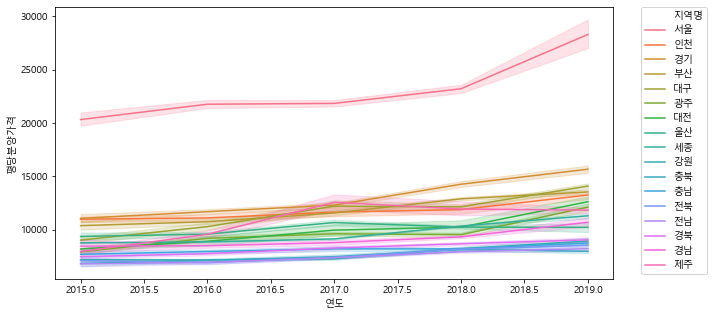

In [97]:
# lineplot으로 연도별 평당분양가격 

# Seaborn의 장점 : 대부분의 사용법이 동일
sns.lineplot(data=df_last, x="연도", y="평당분양가격")
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
#legend 위치 옮기기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 라인그래프에 겹쳐지기 때문에 잘 보이지 않음. 

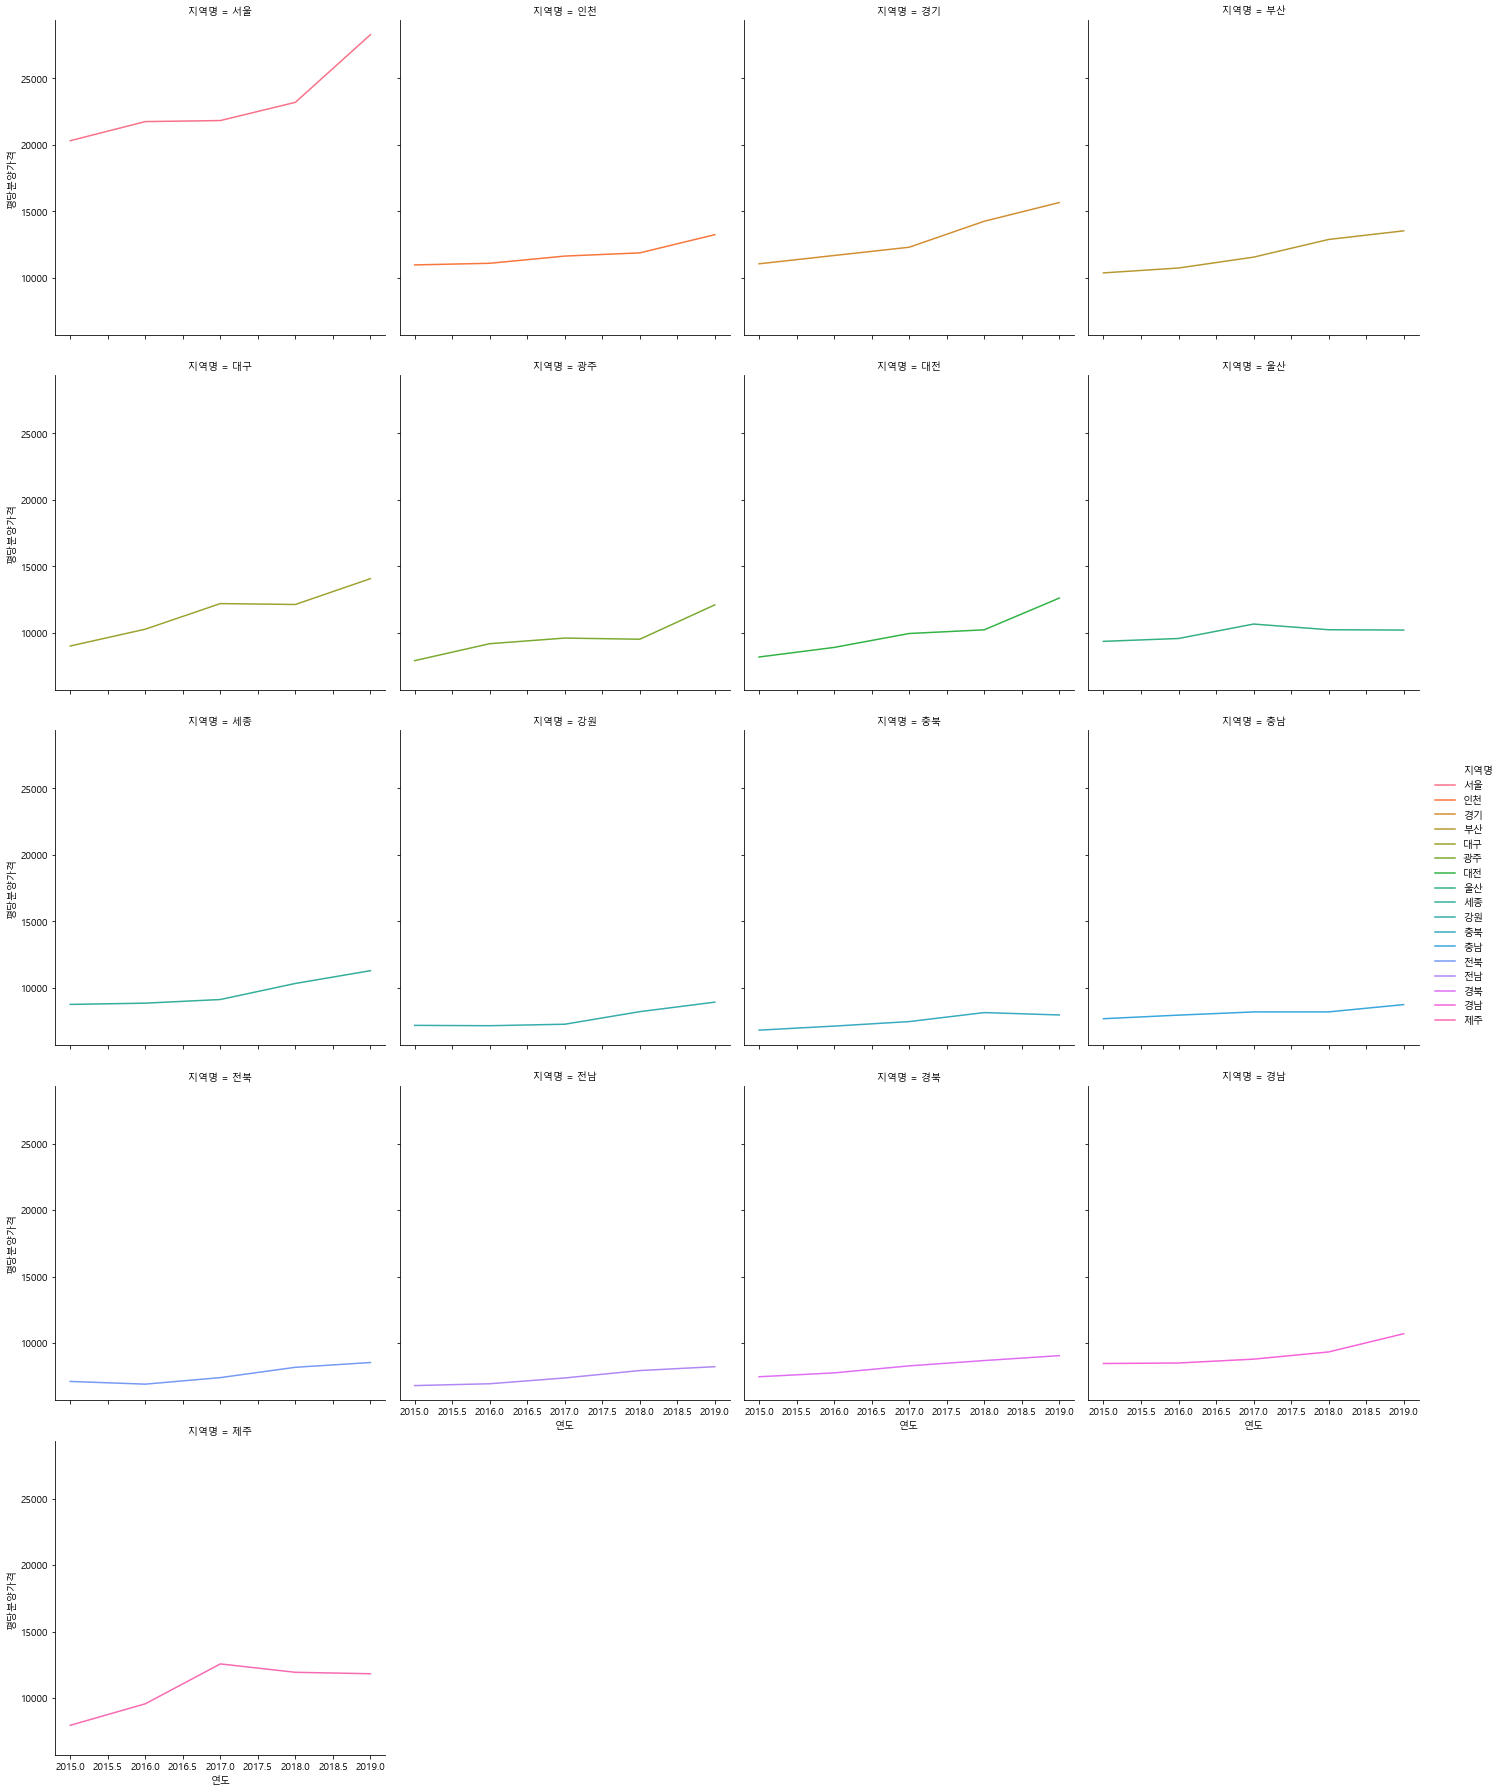

In [98]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

# kind 옵션 지정해주지 않으면, scatter plot 이 기본값 
# col_wrap 한줄에 몇개까지 보여줄것인지.

# **도움말 보기  shift + tap 키 

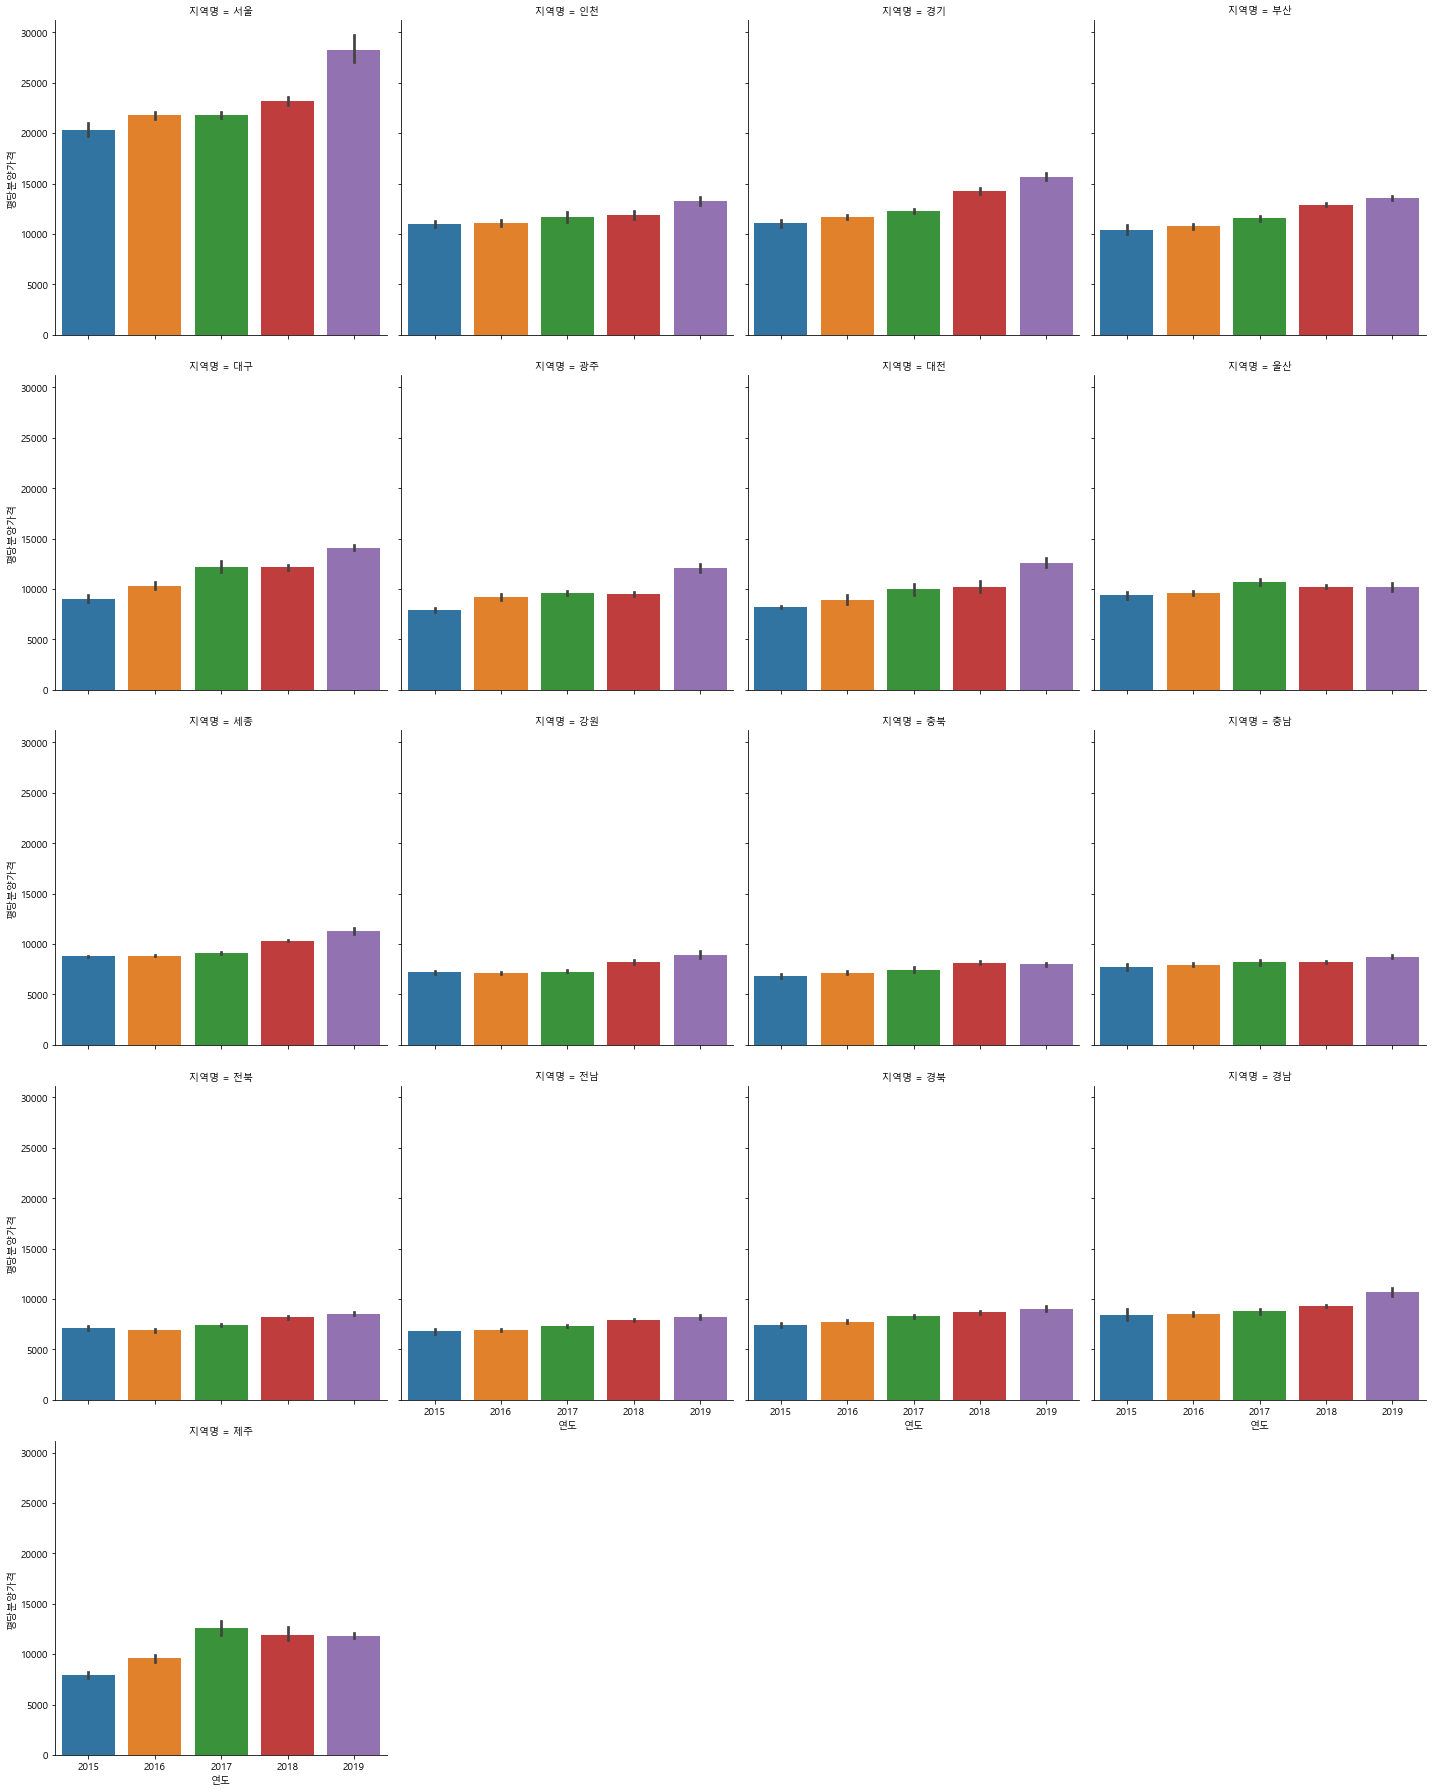

In [99]:
# 지역별로 subplot 시각화
sns.catplot(data=df_last, x="연도", y="평당분양가격", 
            kind="bar", col="지역명", col_wrap=4)
# Seaborn 의 subplot 으로 시각화가 쉬움. *** Seaborn 의 장점 **

# Pandas 를 사용할 경우 
# => groupby 또는 pivot table로 연산한 후에
# subplot 구현도, 반복문으로 일일히 하도록 구현해야함 

**boxplot**
- 최솟값
- 제 1사분위 수
- 제 2사분위 수( ), 즉 중앙값
- 제 3사분위 수( )
- 최댓값 

- 이상치 는 별 또는 점으로 따로 표시한다 

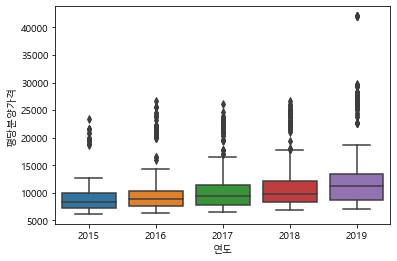

In [100]:
# 연도별 평당분양가격을 boxplot으로
sns.boxplot(data=df_last, x="연도", y="평당분양가격")

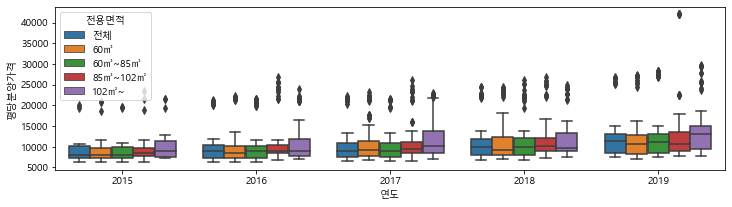

In [101]:
# hue옵션으로 전용면적별로 표시

plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

# 2019년의 전용면적 85-102에서만 특이한 이상치 볼 수 있음.
# 면적이 큰 전용면적에서 편차가 더 큰 편임을 시각적으로 확인 가능하다.

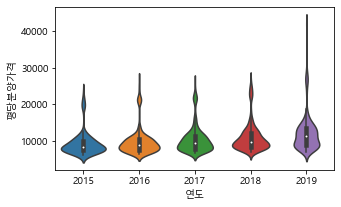

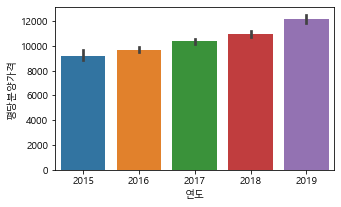

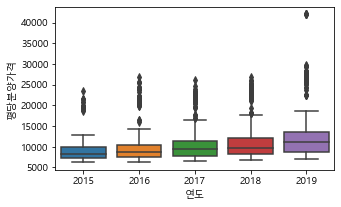

In [102]:
# violinplot 으로  boxplot을 똑같이 표현 가능 


# violinplot =>> 데이터 분포도 함께 시각적으로 확인 가능.
#   => 밀도를 추정한 값을 시각화 함 
plt.figure(figsize=(5,3))
sns.violinplot(data=df_last, x="연도", y="평당분양가격")
# violinplot은 boxplot의 단점을 보완한 것. 


# barplot은 평균값에 대한 높이만 표현 -> 데이터포함 정도 확인 X
plt.figure(figsize=(5,3))
sns.barplot(data=df_last, x="연도", y="평당분양가격")
# boxplot은 데이터의 많고 적음, 이상치 확인 => 박스 안의 값 분포 확인X
plt.figure(figsize=(5,3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격")

### 왜 violinplot을 써야 하는가?
* https://www.autodesk.com/research/publications/same-stats-different-graphs

* **Anscombe's Quartet data** 
<br>: 다른 분포를 가지나, 요약값, 회귀선, 평균값, 표준편차 값이 다 똑같음
=> 요약된 수치만으로는 데이터 정확하게 파악하기 어렵다

* **데이터 시각화가 왜 중요한지 ?**
박스플롯의 단점 : 로우데이터의 분포가 바뀌더라도, 박스플롯의 변화보이지 않음.
* **그러나, violinplot 에서는 데이터의 분포를 반영함** (로우데이터가 변화할때)

In [ ]:
# esc + b : 밑에 셀 추가
# esc + m : 문서셀로 변환 (넘버링도 자동으로 됨)

### 1.7.6   lmplot과 swarmplot 

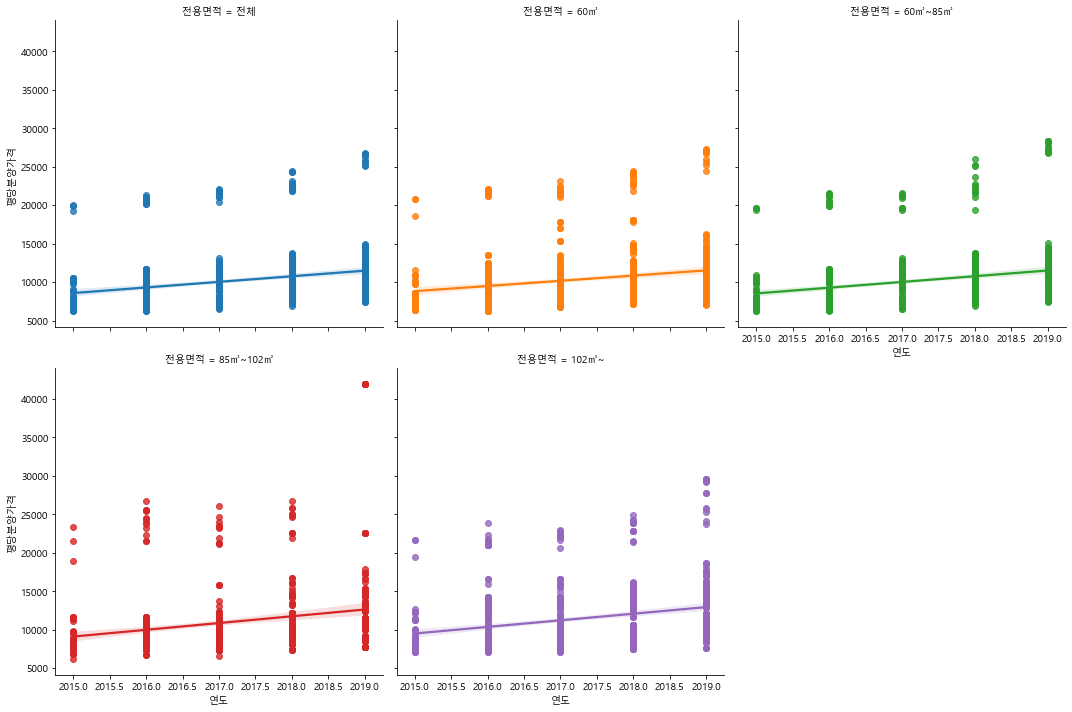

In [103]:
# scatterplot : 데이터의 분포를 보여줌
# sns.scatterplot(data=df_last, x="연도", y="평당분양가격")

# regplot : 데이터의 상관관계 같이 보여줌
# sns.regplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적") #오류 

# 색깔별 표현 옵션 -> lmplot
sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", 
           col="전용면적", col_wrap=3)
# 색이 겹쳐져서 보이기 때문에, 그래프를 나눠서 보기 

# lmplot 은 x, y 축이 모두 수치형일때 사용이 적합하나,

# 이 데이터에서의 연도는 수치형이라기 보다는 
# -> 카테고리, 범주형에 가깝기 때문에 
# => swarmplot이 적합해 보임.

C:\Users\soomin\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soomin\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


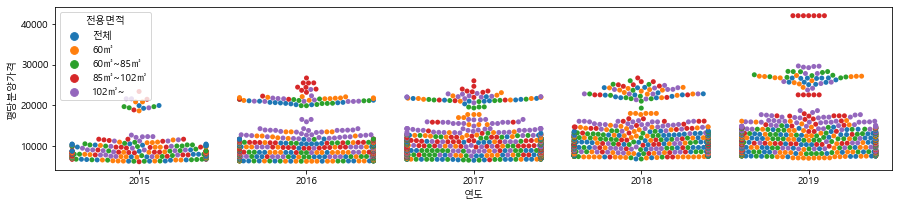

In [104]:
# swarmplot  연도별 평당분양가격 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합

# 옆으로 늘어뜨려 산점도 표현
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last, x="연도",  y="평당분양가격", hue="전용면적")

# 모든데이터를 점으로 표현하기 때문에 -> 시간이 많이 소요됨
# => 많은 데이터를 보기에 swarmplot은 적합하지 않음. 


### 1.7.7  이상치 보기

In [105]:
df_last["평당분양가격"].describe()

# **요약만으로 데이터를 단정지을 수 없음.
# **시각화로 -> 이상치를 발견하기 쉬워짐. 

# 평균이 10685 이나, 최대가격은 42002로 차이가 많이 남 
# 중앙값에 비해서 평균이 많이 크기 때문에 => 이상치의 영향을 예상가능. 
# 시각화 내용으로 -> 어느데이터에 이상치 포함 됐는지 확인

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [106]:
# 가장 큰 값을 변수에 저장
max_price = df_last["평당분양가격"].max()
max_price

# max_price = df_last["평당분양가격"] > 4000

42002.399999999994

In [107]:
# 가장 큰값 찾기
df_last[df_last["평당분양가격"] == max_price]


,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


* **데이터 시각화**의 이유 :
<br>데이터를 통해서 이상치의 존재 또는 데이터의 경향성 확인, 
<br>가설을 세우고 가설 검정을 할때 시각화를 통해서 표현함


* Pandas에서는 groupby나 pivottable로 따로 연산과정이 필요하나
* Seaborn에서는 별도의 연산 과정 필요 없다. 

### 1.7.8  수치데이터 히스토그램 그리기

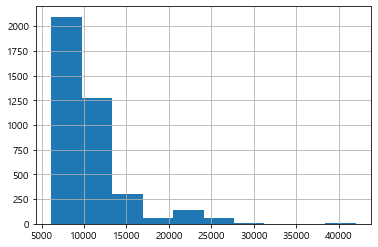

In [108]:
# x,y 두개의 축이 들어간 시각화 수행.

# pandas의 hist 내장 기능 
# 수치데이터만 갖고 시각화 하기 
df_last["평당분양가격"]  # 결측치 확인 가능
h = df_last["평당분양가격"].hist(bins=10) #변수에 할당하면 부수적 문구 출력 방지 가능 
# bins 는 몇개의 통에 담아줄건지 정하는 것. 
# binning 또는 bucketing 

# 히스토그램 : (왼쪽)빈도수를 표현 -> 도수분표표를 시각화 함 

In [109]:
# 결측치가 없는 데이터에서 평당분양가격만 가져오기 
# price 변수에 담기 
df_last["평당분양가격"].notnull()

price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

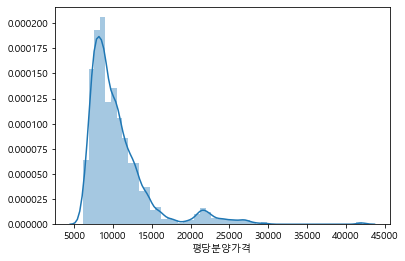

In [110]:
# displot으로도 평당분양가격 표현 가능
# sns.distplot(df_last["평당분양가격"]) #시리즈 데이터를 입력해야함

sns.distplot(price)
# **(왼쪽)빈도수를 표현한 것이 아님.

# kde : 가우시안, 정규분포, 가우스 분포 의미.
# 히스토그램의 가우시안 분포를 추정해서 그림
# 곡선의 면적이 1이 되는 값이 왼쪽의 값임. 

* 시도별로 subplot으로 시각화
<br>distplotd의 subplot -> 산마루형태의 ridgeplot으로 표현 
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

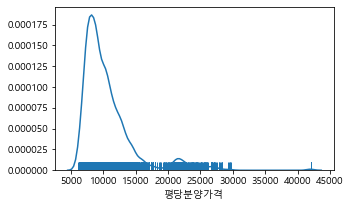

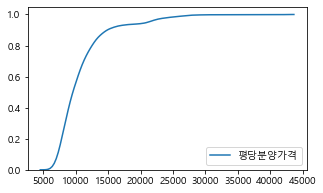

In [111]:
plt.figure(figsize=(5,3))
sns.distplot(price, hist=False, rug=True)
# rug : 빈도수를 같이 표현

plt.figure(figsize=(5,3))
sns.kdeplot(price, cumulative=True)
# cumulateive : 누적그래프를 보여줌. 어느 부분에서 값이 많이 등장했는지 
# (현재 데이터에서는 의미없음)
# kdeplot은 rug옵션을 가지지 않음

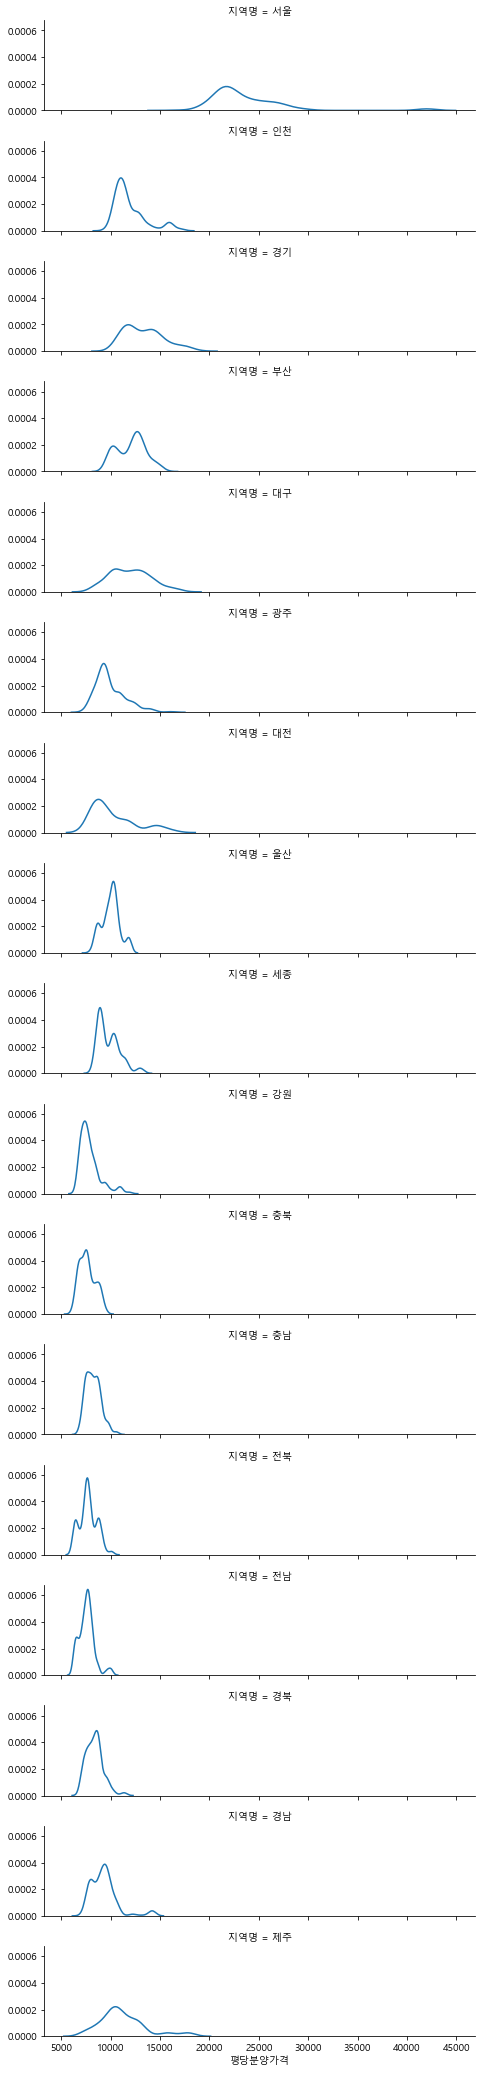

In [112]:
# subplot으로 표현하기
g = sns.FacetGrid(df_last, row="지역명",
                  height=1.7, aspect=4)
g.map(sns.kdeplot, "평당분양가격");

# 지방은 분포가 주로 왼쪽으로 치우쳐 있음. 
# 서울은 가운데에 분포가 잇음, 이상치 또한 확인 가능 

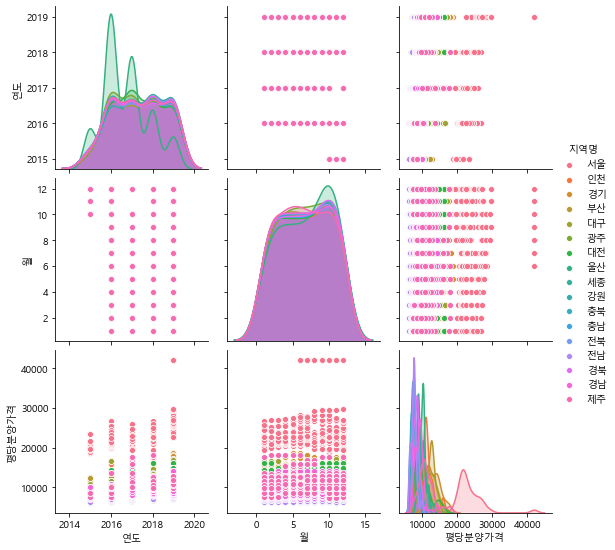

In [113]:
# pairplot
# sns.pairplot(df_last)

# 결측치가 있을때 그래프 표현 오류가 남 -> notnull()
# df_last.loc[,] -> 시각화할 열 선택 
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), 
                          ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

#지방가격은 왼쪽치우친데 반해, 서울지역 중간에 밀집 및 이상치 확인 가능

### 1.8 2015년 8월 이전 데이터 보기

In [114]:
# 정한 개수까지 전체 데이터 확인하기 -> ...로 표현 생략 방지
pd.options.display.max_columns = 25 

In [115]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [116]:
df_first.head()

# 직관적으로 확인하기에 -> df_last _first 바로 병합 가능한 상태 X

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [117]:
df_first.info()
# 행 17개, 결측치는 없어보임. int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [118]:
# 결측지 여부 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### 1.81 Pandas의 melt 사용, Tidy data 만들기

**melt** : 컬럼의 값을 행으로 다 녹이는 것. <Tidy data 만들기>
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [119]:
!pip install IPython 
from IPython.display import Image

<img src="img/pandas_melt.png" styles="width:50px;height:20px"/>
<br>

![molt](img/molten.png)
<br>**컬럼의 값을 행으로 모두 "녹여" 준것**

In [135]:
# pd.melt 를 사용하여 녹인 데이터를 df_first_melt 변수에 담기 

# df_first.melt?
df_first_melt = df_first.melt(id_vars="지역", 
                              var_name="기간", value_name="평당분양가격") 
# 지역 컬럼을 놓고, 나머지 컬럼을 행으로 녹이겠다.

df_first_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [121]:
# 컬럼명 변경하기 
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [123]:
# "기간" 데이터가 df_last와 합치기 위해 같아야 하므로 

# split 을 통해 "년"을 기준으로 텍스트 분리하기
# ex)
date = "2013년12월"
# date.split()  : date의 담긴 값을 공백을 기준으로 split 하기 
date.split("년")     # 년을 기준으로 split  
                     # 리스트 형태로 반환  > ['2013', '12월'] 
date.split("년")[0]  # '2013' 추출  

'2013'

In [124]:
# 리스트 인덱싱을 사용해서 
# 연도만 가져오기 

date.split("년")[-1].replace("월","") #마지막 글자는 -1로도 추출 가능 

'12'

In [136]:
# parse_year 라는 함수 만들기
# 연도만 반환하기 . 반환데이터는 int 타입(숫자)이 되도록 하기.

def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [126]:
# 제대로 분리가 되었는지 parse_year 함수 확인하기
parse_year(date)

2013

In [137]:
# parse_month 라는 함수 만들기
# 월만 반환하기. 반환데이터 int 타입이 되도록 하기.

def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

m = parse_month(date)
print(type(m))
m

<class 'int'>


12

In [140]:
# df_first_melt 변수에 따로 담은 데이터프레임에서
# apply를 활용해, 위에서 만든 함수(parse_year)로 연도만 추출하여 
# -> 새로운 컬럼에 담기 

# df_first_melt["기간"] > 시리즈 형태로 출력
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [141]:
# df_first_melt변수에 담긴 데이터프레임에서 
# apply를 활용해, 월만 추출하기 -> 새 컬럼에 담기 

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [142]:
# df_last 와 병합하기 위해, 동일한 컬럼 이름 필요하므로 
# sample 활용하여 데이터 미리보기 
df_last.head(1)
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
4242,경남,2019,11,3174.0,10474.2,60㎡~85㎡


In [143]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [144]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [149]:
# 최근 데이터에는 전용면적이 항목이 있음. 
# 이전 데이터에는 전용면적이 없음 -> 최근데이터에서 "전체"포함하는 항목만 사용
# loc -> "전체"데이터만 추출. => 원본(df_last)에 영향을 피하기 위해 copy로 복사해서 
#                                df_last_prepare 변수에 담기
#                                (copy를 이용하면 _prepare 변경해도 원본에 영향X)

# df_last["전용면적"] == "전체"  # Boolean indexing : True False 값 추출 
# df_last에서 "전체"만 해당하는 subset 추출하기 
# df_last[df_last["전용면적"] == "전체"]  
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [154]:
df_first_melt.columns = ['지역명', '기간', '평당분양가격', '연도', '월']
df_first_melt.columns

Index(['지역명', '기간', '평당분양가격', '연도', '월'], dtype='object')

In [158]:
# df_first_melt 에서 공통 컬럼만 가져오기
# copy로 복사. df_first_prepare 변수에 담기
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


- 여기까지 데이터를 합치기 위한 전처리.

### 1.8.3 concat으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

* concat - 컬럼명이 같을 때, 하나의 데이터프레임이 되는 형식
![concat](img/pandas_concat.png)

In [162]:
# df_frist_prepare , df_last_prepare 합치기

df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [163]:
# 연도별로 데이터 개수 value_counts 로 확인

df["연도"].value_counts(sort=False)
# 13, 15년은 몇달의 데이터 누락 확인 가능 

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### 1.8.4  pivot_table 사용하기

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

* **pivot**
<br> : melt로 녹여준 데이터를 다시 컬럼으로 만드는 것
![pivot](img/pandas_pivot.png)

-pivot : 연산을 하지 않고, 데이터 형태만 변경.
<br>-pivot_table : 연산도 같이 진행.

In [169]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격 피봇테이블 그리기
# pd.pivot_table(df, index="연도", columns="지역명") #모든 수치데이터 연산해버림 

t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


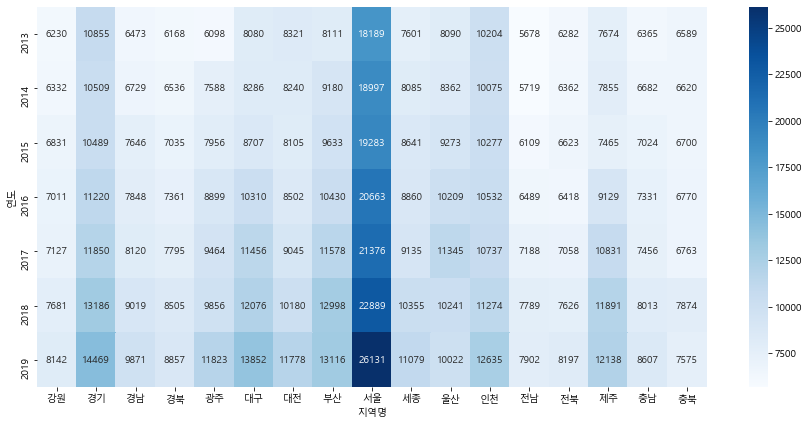

In [172]:
# 위에서 그린 피봇테이블을 히트맵으로 표현하기
# 히트맵은 다른 seaborn 하고 다름

plt.figure(figsize=(15,7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")
# annot 숫자 표현, fmt = .of 소수점 없이 표현 

In [173]:
# transpose 로 행과 열 바꾸기

t.T

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


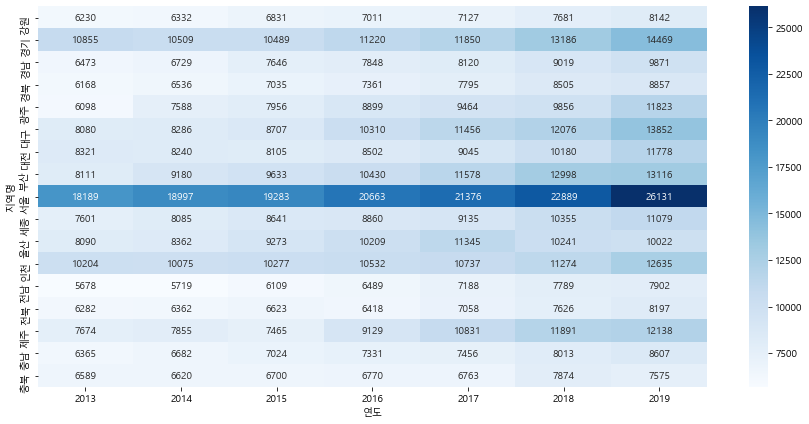

In [174]:
plt.figure(figsize=(15,7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

# 특히 서울이 해가 갈수록 평균분양가 증가함을 진해지는 색으로 확인 가능
# 다른 지역도 마찬가지 경향

In [175]:
# pivot_table 과 마찬가지로, Groupby로도 표현 가능 
df.groupby(["연도", "지역명"])["평당분양가격"].mean()
# pivot_table과 다른 형태의 df 출력됨
# stack 과 unstack 이용 

연도    지역명
2013  강원      6230.00
      경기     10855.00
      경남      6473.00
      경북      6168.00
      광주      6098.00
               ...   
2019  전남      7902.40
      전북      8196.65
      제주     12137.95
      충남      8606.95
      충북      7574.60
Name: 평당분양가격, Length: 119, dtype: float64

**stack / unstack**
* **stack** : melt 처럼 컬럼을 녹여내는 것
* **unstack** : MultiIndex 상에서 맨 끝의 컬럼(맨 마지막 인덱스 값)을 -> 컬럼으로 만듬.
![uns](img/unstack.png)

In [176]:
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


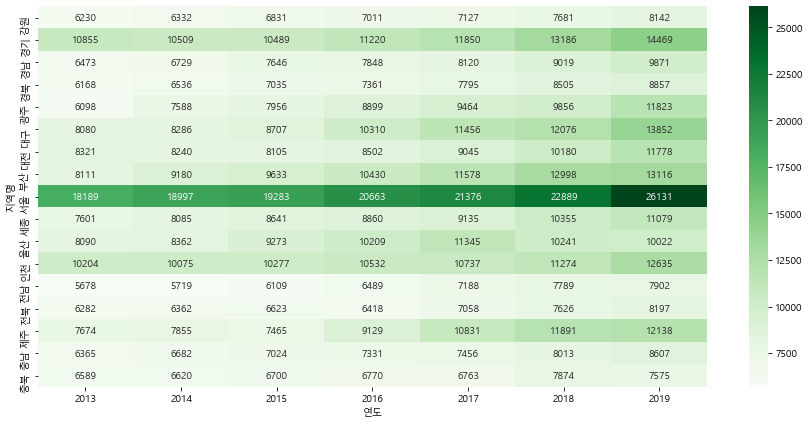

In [180]:
# 히트맵으로 똑같이 표현해보기
plt.figure(figsize=(15,7))
sns.heatmap(g.T, cmap="Greens", annot=True, fmt=".0f")

## 1.9 2013년부터 최근 데이터까지 시각화하기
### 1.9.1 연도별 평당분양가격 보기

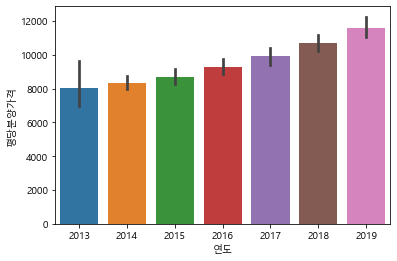

In [181]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격")

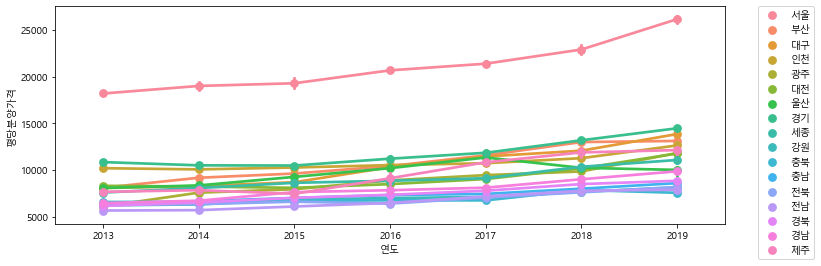

In [183]:
# pointplot 으로 연도별 평당분양가격 그리기
plt.figure(figsize=(12,4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
#legend 위치 옮기기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 연도별로 꾸준한 증가세 확인 가능 

(72, 4)


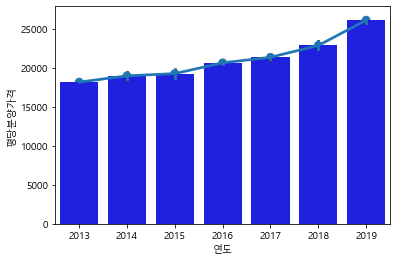

In [190]:
# 서울만 barplot으로 그리기
df_seoul = df[df["지역명"] == "서울"].copy()
# ** copy를 통하여 명시적으로 복사 **

print(df_seoul.shape)

sns.barplot(data=df_seoul, x="연도", y="평당분양가격", color="b")
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

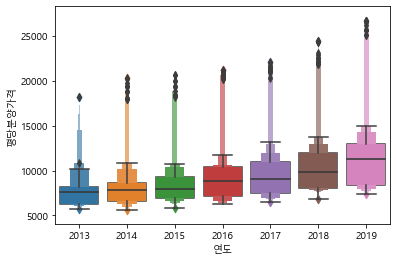

In [192]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x="연도", y="평당분양가격")

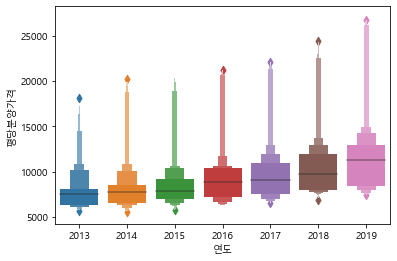

In [193]:
# *boxenplot : boxplot과 violinplot 의 중간 형태
sns.boxenplot(data=df, x="연도", y="평당분양가격")

# 가운데 선 : 중앙값 의미
# 값이 어느 구간에 있는지 자세히 볼 수 있음 

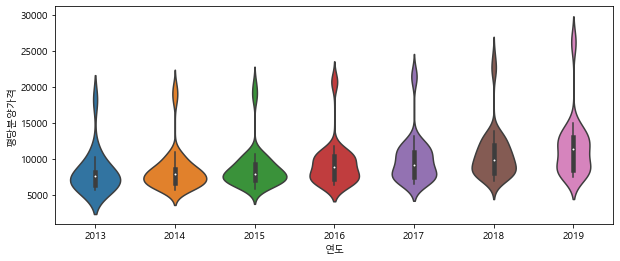

In [195]:
#  violinplot 
plt.figure(figsize=(10,4))
sns.violinplot(data=df, x="연도", y="평당분양가격")
# 바이올린 안의 흰 점이 -> 중앙값 

# boxen 보다 조금더 데이터 자세히 표현 

C:\Users\soomin\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soomin\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


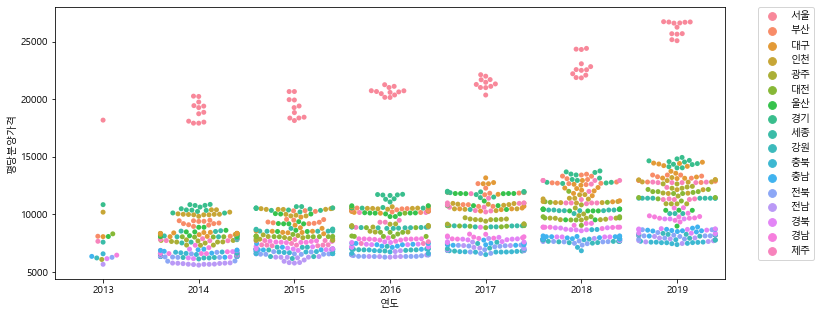

In [198]:
# 연도별 평양분양가격 swarmplot 그리기

# lmplot : scatterplot 에 회귀선을 같이 보여줌
# scatterplot 은 데이터의 분포를 겹쳐 보여주므로 -> 어디에 분포되있는지 확인 어려움

# swarmplot은 분포를 보여줌
plt.figure(figsize=(12,5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
#legend 위치 옮기기
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 1.9.2 지역별 평당분양가격 보기

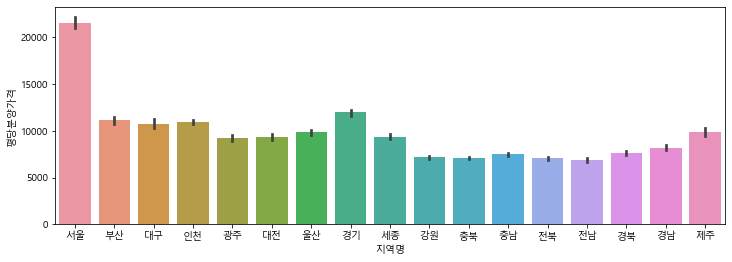

In [199]:
# barpot 을 지역별 평당분양가격 그리기

plt.figure(figsize=(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

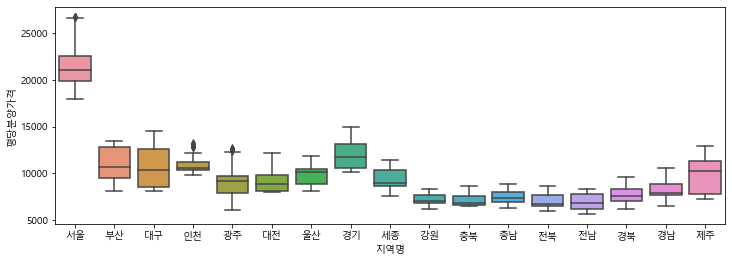

In [200]:
# boxplot 으로 지역별 평당분양가격 그리기

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

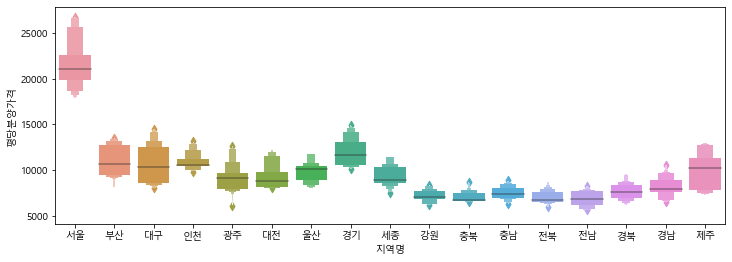

In [201]:
# boxenplot 으로 표현
plt.figure(figsize=(12, 4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")
# boxplot 보완 -> box 안 distribution 을 여러개의 박스로 표현함

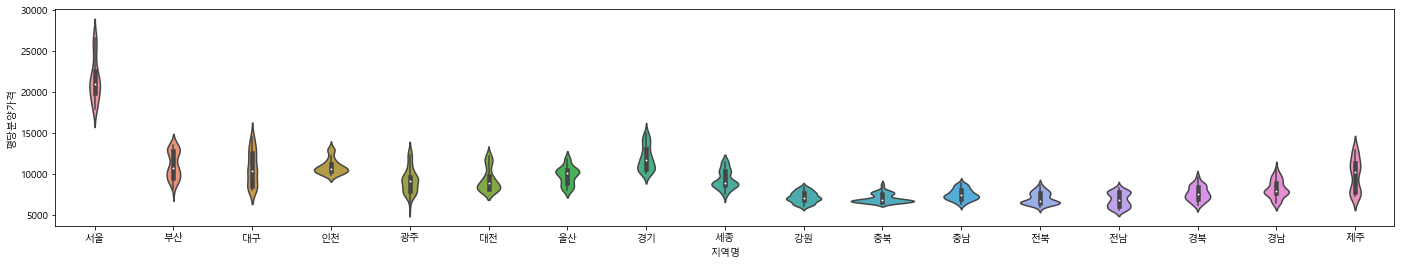

In [202]:
# violinplot 으로 표현

plt.figure(figsize=(24, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

C:\Users\soomin\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soomin\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


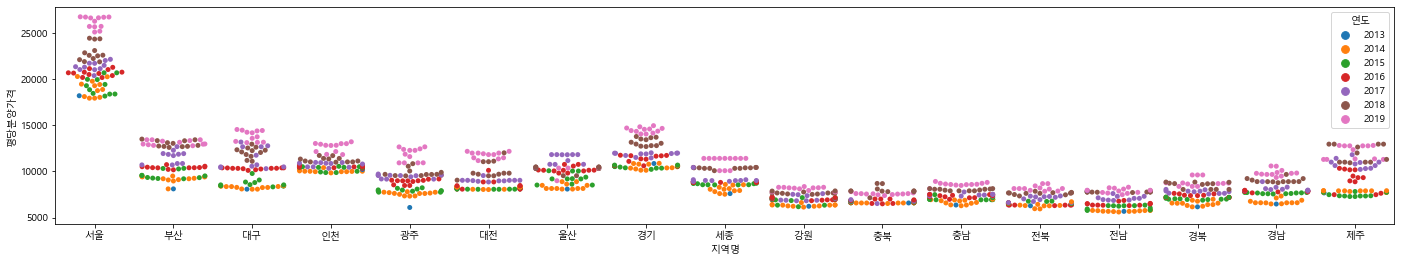

In [203]:
# swarmplot 으로 표현하기 
plt.figure(figsize=(24, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")